# 1. 赛题分析
比赛要求参赛选手根据给定的数据集，建立模型，预测房屋租金。  
数据集中的数据类别包括租赁房源、小区、二手房、配套、新房、土地、人口、客户、真实租金等。  
这是典型的回归预测。  
  
## 预测指标
#### 回归结果评价标准采用R-Square
**R2（R-Square）的公式为**：
残差平方和：
$$
SS_{res}=\sum\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
总平均值:
$$
SS_{tot}=\sum\left(y_{i}-\overline{y}_{i}\right)^{2}
$$

其中$\overline{y}$表示$y$的平均值
得到$R^2$表达式为：
$$
R^{2}=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{\sum\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum\left(y_{i}-\overline{y}\right)^{2}}
$$
$R^2$用于度量因变量的变异中可由自变量解释部分所占的比例，取值范围是 0~1，$R^2$越接近1,表明回归平方和占总平方和的比例越大,回归线与各观测点越接近，用x的变化来解释y值变化的部分就越多,回归的拟合程度就越好。所以$R^2$也称为拟合优度（Goodness of Fit）的统计量。

$y_{i}$表示真实值，$\hat{y}_{i}$表示预测值，$\overline{y}_{i}$表示样本均值。得分越高拟合效果越好。
  
  
## 数据概况

**1.租赁基本信息：**
* ID——房屋编号　　　　　　　　　　　　　　　　　　
* area——房屋面积 　　　
* rentType——出租方式：整租/合租/未知　
* houseType——房型 　　　　　　　　　
* houseFloor——房间所在楼层：高/中/低　　　　　
* totalFloor——房间所在的总楼层数　　　　　　　　
* houseToward——房间朝向　　　　　　　　　　　
* houseDecoration——房屋装修　

* tradeTime——成交日期　　　　　　　　　　　　　　　
* tradeMoney——成交租金　

**2.小区信息：**
* CommunityName——小区名称　　　　　　　　
* city——城市　　　　　　　　　　　　　　　　　
* region——地区　　　　　　　　　　　　　　　
* plate——区域板块　　　　　　　　　　　　　　
* buildYear——小区建筑年代　　　　　　　　　　
* saleSecHouseNum——该板块当月二手房挂牌房源数　　　

**3.配套设施：**
* subwayStationNum——该板块地铁站数量　　　　　　　
* busStationNum——该板块公交站数量　　　　　　　　　
* interSchoolNum——该板块国际学校的数量　　　　　　
* schoolNum——该板块公立学校的数量　　　　　　　　
* privateSchoolNum——该板块私立学校数量　　　　　
* hospitalNum——该板块综合医院数量　　　　　　　　　
* DrugStoreNum——该板块药房数量　　　　　　　　
* gymNum——该板块健身中心数量　　　　　　　　　　
* bankNum——该板块银行数量　　　　　　　　　　　
* shopNum——该板块商店数量　　　　　　　　　　　
* parkNum——该板块公园数量　　　　　　　　　　　
* mallNum——该板块购物中心数量　　　　　　　　　
* superMarketNum——该板块超市数量　　　　　　　

**4.其他信息：**
* totalTradeMoney——该板块当月二手房成交总金额　　　
* totalTradeArea——该板块二手房成交总面积　　　　　　
* tradeMeanPrice——该板块二手房成交均价　　　　　　　
* tradeSecNum——该板块当月二手房成交套数　　　　　

* totalNewTradeMoney——该板块当月新房成交总金额　　　
* totalNewTradeArea——该板块当月新房成交的总面积　　　
* totalNewMeanPrice——该板块当月新房成交均价　　　　　
* tradeNewNum——该板块当月新房成交套数　　　　　　　　
* remainNewNum——该板块当月新房未成交套数　　　　　　
* supplyNewNum——该板块当月新房供应套数　　　　　　　

* supplyLandNum——该板块当月土地供应幅数　　　　　 
* supplyLandArea——该板块当月土地供应面积　　　　　
* tradeLandNum——该板块当月土地成交幅数　　　　　　
* tradeLandArea——该板块当月土地成交面积　　　　　 
* landTotalPrice——该板块当月土地成交总价　　　　　
* landMeanPrice——该板块当月楼板价(元/m^{2})　　　

* totalWorkers——当前板块现有的办公人数　　　　　　　
* newWorkers——该板块当月流入人口数（现招聘的人员）　
* residentPopulation——该板块常住人口　　　　　　　　

* pv——该板块当月租客浏览网页次数　　　　　　　　　　　
* uv——该板块当月租客浏览网页总人数　　　　　　　　　　
* lookNum——线下看房次数　　　　　　　　　　　　　　　

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from pylab import *
fname = r"/home/ach/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.TTF"
myfont = FontProperties(fname=fname)
import seaborn as sns

In [115]:
# 根据特征含义和特征一览，大致可以判断出数值型和类别型特征如下
categorical_feas = ['rentType', 'houseType', 'houseFloor', 'region', 'plate', 'houseToward', 'houseDecoration',
    'communityName','city','region','plate','buildYear']
numerical_feas=['ID','area','totalFloor','saleSecHouseNum','subwayStationNum',
    'busStationNum','interSchoolNum','schoolNum','privateSchoolNum','hospitalNum',
    'drugStoreNum','gymNum','bankNum','shopNum','parkNum','mallNum','superMarketNum',
    'totalTradeMoney','totalTradeArea','tradeMeanPrice','tradeSecNum','totalNewTradeMoney',
    'totalNewTradeArea','tradeNewMeanPrice','tradeNewNum','remainNewNum','supplyNewNum',
    'supplyLandNum','supplyLandArea','tradeLandNum','tradeLandArea','landTotalPrice',
    'landMeanPrice','totalWorkers','newWorkers','residentPopulation','pv','uv','lookNum']


# 我们可以发现这是房价预测，所以应该是属于回归问题

In [68]:
data = pd.read_csv('./数据集/train_data.csv')
data

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,332760000,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41435,100000438,10.00,合租,4室1厅1卫,高,11,北,精装,XQ01209,SH,...,573070000,4313.0100,20904,0,245872,29635.0,2662.0,0,2018/2/5,2190.0
41436,100000201,7.10,合租,3室1厅1卫,中,6,北,精装,XQ00853,SH,...,0,0.0000,4370,0,306857,28213.0,2446.0,0,2018/1/22,2090.0
41437,100000198,9.20,合租,4室1厅1卫,高,18,北,精装,XQ00852,SH,...,0,0.0000,4370,0,306857,19231.0,2016.0,0,2018/2/8,3190.0
41438,100000182,14.10,合租,4室1厅1卫,低,8,北,精装,XQ00791,SH,...,0,0.0000,4370,0,306857,17471.0,2554.0,0,2018/3/22,2460.0


In [69]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 51 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,...,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41422.000000,41422.000000,41440.000000,4.144000e+04
mean,1.001221e+08,70.959409,11.413152,1.338538,5.741192,187.197153,1.506395,48.228813,6.271911,4.308736,...,12621.406425,1.045363e+08,724.763918,77250.235497,1137.132095,294514.059459,26945.663512,3089.077085,0.396260,8.837074e+03
std,9.376566e+04,88.119569,7.375203,3.180349,4.604929,179.674625,1.687631,29.568448,4.946457,3.359714,...,49853.120341,5.215216e+08,3224.303831,132052.508523,7667.381627,196745.147181,32174.637924,2954.706517,1.653932,5.514287e+05
min,1.000000e+08,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,600.000000,0.000000,49330.000000,17.000000,6.000000,0.000000,0.000000e+00
25%,1.000470e+08,42.607500,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,165293.000000,7928.000000,1053.000000,0.000000,2.800000e+03
50%,1.000960e+08,65.000000,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,...,0.000000,0.000000e+00,0.000000,38947.000000,0.000000,245872.000000,20196.000000,2375.000000,0.000000,4.000000e+03
75%,1.001902e+08,90.000000,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,...,0.000000,0.000000e+00,0.000000,76668.000000,0.000000,330610.000000,34485.000000,4233.000000,0.000000,5.500000e+03
max,1.003218e+08,15055.000000,88.000000,52.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,...,555508.010000,6.197570e+09,37513.062490,855400.000000,143700.000000,928198.000000,621864.000000,39876.000000,37.000000,1.000000e+08


rentType
--          5
合租       5204
整租       5472
未知方式    30759
dtype: int64


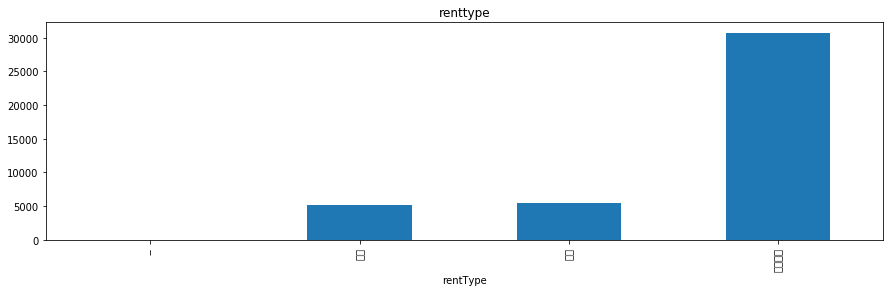

In [70]:
groupby_user = data.groupby('rentType').size()
print(groupby_user)
groupby_user.plot.bar(title='renttype',figsize = (15,4))
warnings.filterwarnings("ignore")# 忽略画图的时候的警告
# 未知方式为主

houseType
0室0厅1卫       1
1室0厅0卫      86
1室0厅1卫    1286
1室1厅0卫      12
1室1厅1卫    9805
          ... 
8室2厅4卫       1
8室3厅4卫       1
8室4厅4卫       1
9室2厅5卫       1
9室3厅8卫       1
Length: 104, dtype: int64


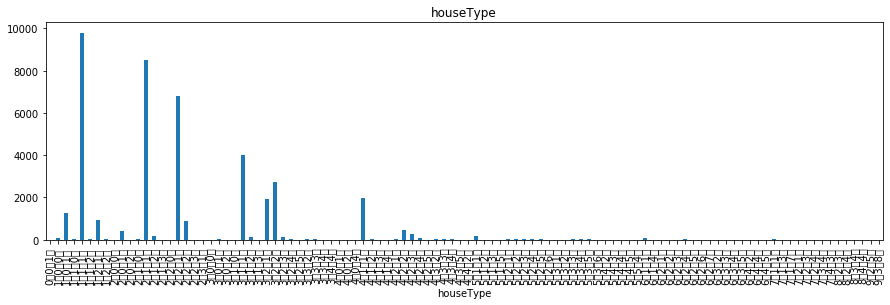

In [71]:
groupby_user = data.groupby('houseType').size()
print(groupby_user)
groupby_user.plot.bar(title='houseType',figsize=(15,4))
warnings.filterwarnings("ignore")# 忽略画图的时候的警告
#说明大部分人选择一室一厅一卫

houseFloor
中    15458
低    11916
高    14066
dtype: int64


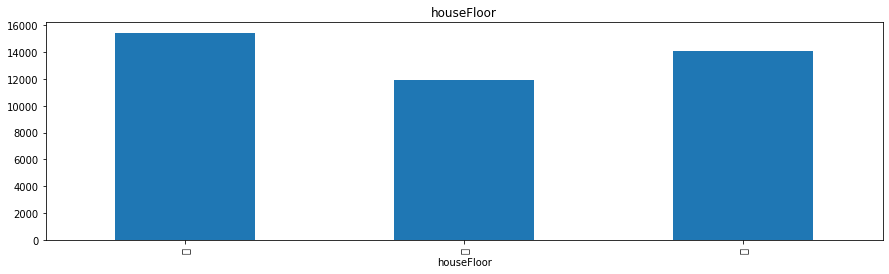

In [72]:
groupby_user = data.groupby('houseFloor').size()
print(groupby_user)
groupby_user.plot.bar(title='houseFloor', figsize=(15,4))
warnings.filterwarnings("ignore")# 忽略画图的时候的警告

totalFloor
0         5
1        98
2       193
3       446
4       486
5      2730
6     15797
7      1362
8       624
9       393
10      401
11     2884
12      738
13      882
14     2166
15      809
16     1147
17     1375
18     3553
19      467
20      457
21      466
22      309
23      161
24      732
25      390
26      300
27      399
28      258
29      289
30      144
31      211
32      234
33      117
34       54
35       57
36       57
37       96
38       33
39       10
40       11
41       17
43       12
45        3
47        4
49       25
51        1
53        7
56       17
58        1
59        1
60        3
61        1
62        5
88        2
dtype: int64


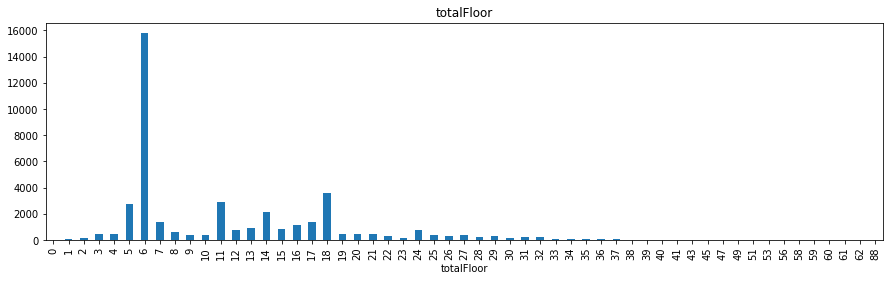

In [73]:
groupby_user = data.groupby('totalFloor').size()
print(groupby_user)
groupby_user.plot.bar(title='totalFloor', figsize=(15,4))
warnings.filterwarnings("ignore")# 忽略画图的时候的警告
# 大部分人选择六楼，需要注意一下

houseDecoration
其他    29040
毛坯      311
简装     1171
精装    10918
dtype: int64


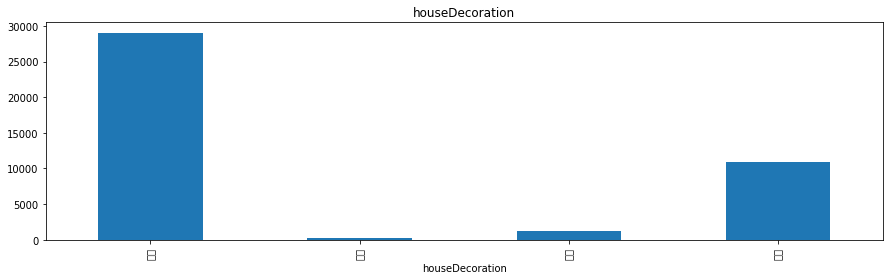

In [74]:
groupby_user = data.groupby('houseDecoration').size()
print(groupby_user)
groupby_user.plot.bar(title='houseDecoration', figsize=(15,4))
warnings.filterwarnings("ignore")# 忽略画图的时候的警告
# 其他

plate
BK00001      1
BK00002    357
BK00003    523
BK00004    189
BK00005    549
          ... 
BK00062    618
BK00063    281
BK00064    590
BK00065    348
BK00066    219
Length: 66, dtype: int64
[('BK00031', 1958), ('BK00033', 1837), ('BK00045', 1816), ('BK00055', 1566), ('BK00056', 1516), ('BK00052', 1375), ('BK00017', 1305), ('BK00041', 1266), ('BK00054', 1256), ('BK00051', 1253), ('BK00046', 1227), ('BK00035', 1156), ('BK00042', 1137), ('BK00009', 1016), ('BK00050', 979), ('BK00043', 930), ('BK00026', 906), ('BK00047', 880), ('BK00034', 849), ('BK00013', 834), ('BK00053', 819), ('BK00028', 745), ('BK00040', 679), ('BK00060', 671), ('BK00010', 651), ('BK00029', 646), ('BK00062', 618), ('BK00022', 614), ('BK00018', 613), ('BK00064', 590), ('BK00005', 549), ('BK00003', 523), ('BK00014', 500), ('BK00019', 498), ('BK00061', 477), ('BK00011', 455), ('BK00037', 444), ('BK00012', 412), ('BK00038', 398), ('BK00024', 397), ('BK00020', 384), ('BK00002', 357), ('BK00065', 348), ('BK00027', 344

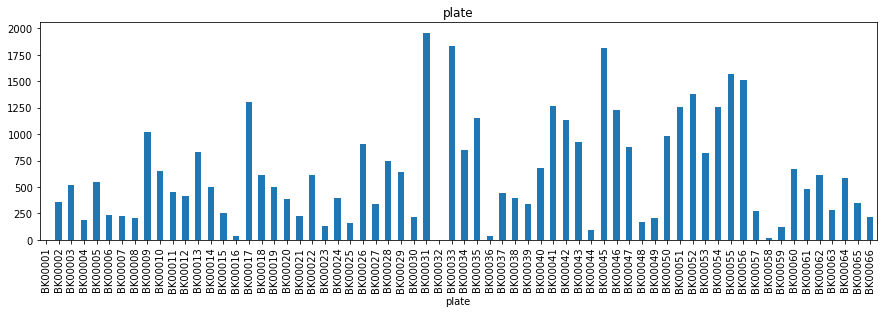

In [75]:
groupby_user = data.groupby('plate').size()
print(groupby_user)
print(sorted(groupby_user.items(),key=lambda item:item[1],reverse=True))
groupby_user.plot.bar(title='plate',figsize=(15,4))
warnings.filterwarnings("ignore")# 忽略画图的时候的警告
# bk00031地方更贵

In [76]:
print(len(data['plate']))

41440


{'BK00045': 824, 'BK00031': 461, 'BK00042': 441, 'BK00016': 387, 'BK00051': 364, 'BK00001': 356, 'BK00057': 331, 'BK00054': 306, 'BK00032': 284, 'BK00052': 276, 'BK00058': 264, 'BK00056': 258, 'BK00062': 196, 'BK00053': 190, 'BK00049': 184, 'BK00035': 178, 'BK00047': 172, 'BK00038': 169, 'BK00046': 167, 'BK00022': 156, 'BK00055': 151, 'BK00061': 151, 'BK00041': 144, 'BK00044': 141, 'BK00040': 138, 'BK00036': 131, 'BK00059': 128, 'BK00020': 114, 'BK00021': 114, 'BK00005': 105, 'BK00026': 101, 'BK00043': 98, 'BK00015': 98, 'BK00033': 96, 'BK00014': 95, 'BK00066': 95, 'BK00017': 92, 'BK00060': 88, 'BK00018': 83, 'BK00012': 82, 'BK00048': 82, 'BK00002': 79, 'BK00034': 78, 'BK00027': 74, 'BK00013': 72, 'BK00025': 70, 'BK00037': 68, 'BK00028': 67, 'BK00010': 62, 'BK00050': 60, 'BK00009': 56, 'BK00007': 52, 'BK00008': 52, 'BK00030': 48, 'BK00023': 47, 'BK00003': 45, 'BK00019': 42, 'BK00039': 41, 'BK00064': 36, 'BK00011': 34, 'BK00004': 30, 'BK00006': 29, 'BK00065': 29, 'BK00029': 27, 'BK00063

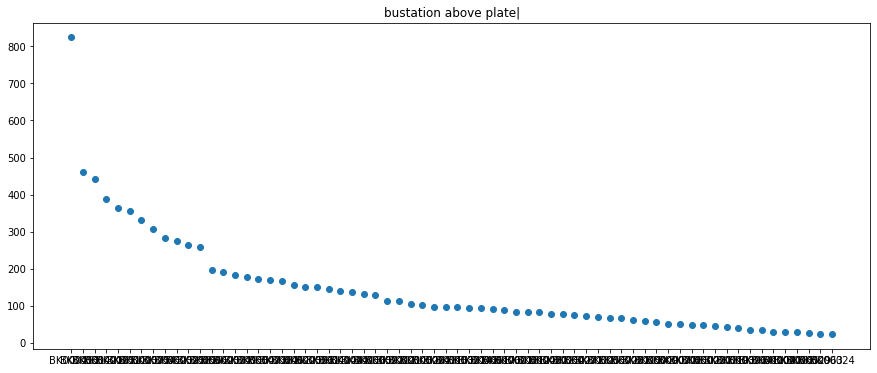

In [77]:
# plt.scatter(data['plate'],data['busStationNum'])
# 公交车站和地区关系
x = []
y = []
for i in range(len(data['plate'])):
    if(data['plate'][i] not in x):
        x.append(data['plate'][i] )
        y.append(data['busStationNum'][i])
# plt.scatter(x,y)
res1 = {}
for i in range(len(x)):
    res1[x[i]] = y[i]
# res2 = sorted(res1.items(),key=lambda item:item[1],reverse=True)
# dict= sorted(res1.iteritems(), key=lambda res1:d[1].getvalue(), reverse = True)
res2 = dict(sorted(res1.items(),key=lambda item:item[1],reverse=True))
print(res2)

plt.figure(figsize=(15,6))
plt.title("bustation above plate|")
plt.scatter(res2.keys(),res2.values())

{'BK00015': 6, 'BK00050': 3, 'BK00032': 3, 'BK00044': 1, 'BK00052': 1, 'BK00064': 0, 'BK00049': 0, 'BK00051': 0, 'BK00031': 0, 'BK00028': 0, 'BK00017': 0, 'BK00045': 0, 'BK00027': 0, 'BK00041': 0, 'BK00047': 0, 'BK00009': 0, 'BK00025': 0, 'BK00024': 0, 'BK00014': 0, 'BK00026': 0, 'BK00042': 0, 'BK00046': 0, 'BK00043': 0, 'BK00013': 0, 'BK00012': 0, 'BK00005': 0, 'BK00011': 0, 'BK00010': 0, 'BK00003': 0, 'BK00033': 0, 'BK00053': 0, 'BK00006': 0, 'BK00004': 0, 'BK00002': 0, 'BK00007': 0, 'BK00016': 0, 'BK00019': 0, 'BK00030': 0, 'BK00048': 0, 'BK00018': 0, 'BK00008': 0, 'BK00029': 0, 'BK00065': 0, 'BK00035': 0, 'BK00036': 0, 'BK00022': 0, 'BK00023': 0, 'BK00054': 0, 'BK00038': 0, 'BK00037': 0, 'BK00034': 0, 'BK00058': 0, 'BK00066': 0, 'BK00039': 0, 'BK00057': 0, 'BK00020': 0, 'BK00059': 0, 'BK00060': 0, 'BK00063': 0, 'BK00055': 0, 'BK00061': 0, 'BK00040': 0, 'BK00056': 0, 'BK00062': 0, 'BK00021': 0, 'BK00001': 0}


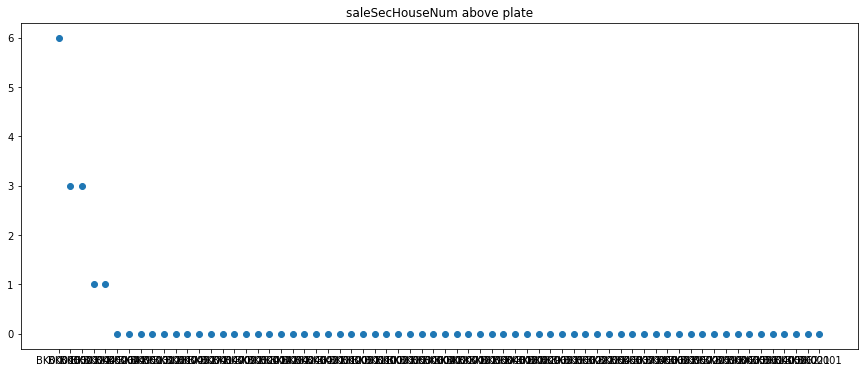

In [78]:
# plt.scatter(data['plate'],data['busStationNum'])
# 房源售卖和地区关系
x = []
y = []
for i in range(len(data['plate'])):
    if(data['plate'][i] not in x):
        x.append(data['plate'][i] )
        y.append(data['saleSecHouseNum'][i])
# plt.scatter(x,y)
res1 = {}
for i in range(len(x)):
    res1[x[i]] = y[i]
# res2 = sorted(res1.items(),key=lambda item:item[1],reverse=True)
# dict= sorted(res1.iteritems(), key=lambda res1:d[1].getvalue(), reverse = True)
res2 = dict(sorted(res1.items(),key=lambda item:item[1],reverse=True))
print(res2)
plt.figure(figsize=(15,6))
plt.title("saleSecHouseNum above plate")
plt.scatter(res2.keys(),res2.values())

{'BK00007': 8, 'BK00008': 8, 'BK00053': 6, 'BK00038': 6, 'BK00031': 4, 'BK00005': 4, 'BK00016': 4, 'BK00034': 4, 'BK00063': 4, 'BK00045': 3, 'BK00014': 3, 'BK00029': 3, 'BK00035': 3, 'BK00036': 3, 'BK00066': 3, 'BK00057': 3, 'BK00060': 3, 'BK00051': 2, 'BK00052': 2, 'BK00013': 2, 'BK00010': 2, 'BK00039': 2, 'BK00020': 2, 'BK00040': 2, 'BK00062': 2, 'BK00021': 2, 'BK00050': 1, 'BK00028': 1, 'BK00027': 1, 'BK00024': 1, 'BK00026': 1, 'BK00042': 1, 'BK00046': 1, 'BK00004': 1, 'BK00018': 1, 'BK00054': 1, 'BK00037': 1, 'BK00058': 1, 'BK00064': 0, 'BK00049': 0, 'BK00044': 0, 'BK00017': 0, 'BK00041': 0, 'BK00047': 0, 'BK00009': 0, 'BK00025': 0, 'BK00043': 0, 'BK00012': 0, 'BK00011': 0, 'BK00003': 0, 'BK00033': 0, 'BK00006': 0, 'BK00002': 0, 'BK00015': 0, 'BK00019': 0, 'BK00030': 0, 'BK00048': 0, 'BK00065': 0, 'BK00022': 0, 'BK00023': 0, 'BK00059': 0, 'BK00055': 0, 'BK00061': 0, 'BK00056': 0, 'BK00032': 0, 'BK00001': 0}


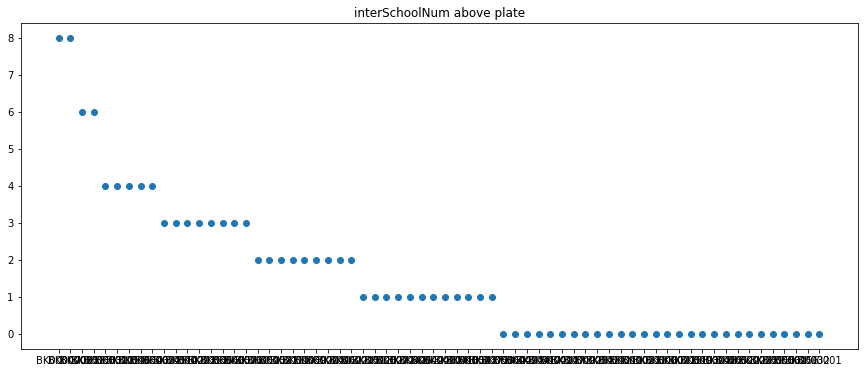

In [79]:
# plt.scatter(data['plate'],data['busStationNum'])
# 学校
x = []
y = []
for i in range(len(data['plate'])):
    if(data['plate'][i] not in x):
        x.append(data['plate'][i] )
        y.append(data['interSchoolNum'][i])
# plt.scatter(x,y)
res1 = {}
for i in range(len(x)):
    res1[x[i]] = y[i]
# res2 = sorted(res1.items(),key=lambda item:item[1],reverse=True)
# dict= sorted(res1.iteritems(), key=lambda res1:d[1].getvalue(), reverse = True)
res2 = dict(sorted(res1.items(),key=lambda item:item[1],reverse=True))
print(res2)
plt.figure(figsize=(15,6))
plt.title("interSchoolNum above plate")
plt.scatter(res2.keys(),res2.values())

In [80]:
def paint(colum:str):
    # plt.scatter(data['plate'],data['busStationNum'])
    x = []
    y = []
    for i in range(len(data['plate'])):
        if(data['plate'][i] not in x):
            x.append(data['plate'][i] )
            y.append(data[colum][i])
    # plt.scatter(x,y)
    res1 = {}
    for i in range(len(x)):
        res1[x[i]] = y[i]
    # res2 = sorted(res1.items(),key=lambda item:item[1],reverse=True)
    # dict= sorted(res1.iteritems(), key=lambda res1:d[1].getvalue(), reverse = True)
    res2 = dict(sorted(res1.items(),key=lambda item:item[1],reverse=True))
    print(res2)
    plt.figure(figsize=(15,6))
    plt.title("{} above plate".format(colum))
    plt.scatter(res2.keys(),res2.values())

{'BK00052': 22, 'BK00057': 14, 'BK00056': 14, 'BK00042': 13, 'BK00002': 11, 'BK00055': 11, 'BK00061': 11, 'BK00041': 9, 'BK00064': 7, 'BK00027': 7, 'BK00012': 7, 'BK00018': 7, 'BK00060': 7, 'BK00040': 7, 'BK00050': 6, 'BK00031': 6, 'BK00053': 6, 'BK00035': 6, 'BK00054': 6, 'BK00020': 6, 'BK00021': 6, 'BK00045': 5, 'BK00014': 5, 'BK00005': 5, 'BK00011': 5, 'BK00010': 5, 'BK00065': 5, 'BK00062': 5, 'BK00013': 4, 'BK00007': 4, 'BK00030': 4, 'BK00008': 4, 'BK00037': 4, 'BK00051': 3, 'BK00028': 3, 'BK00017': 3, 'BK00025': 3, 'BK00024': 3, 'BK00026': 3, 'BK00006': 3, 'BK00004': 3, 'BK00016': 3, 'BK00023': 3, 'BK00066': 3, 'BK00059': 3, 'BK00063': 3, 'BK00049': 2, 'BK00047': 2, 'BK00009': 2, 'BK00043': 2, 'BK00003': 2, 'BK00015': 2, 'BK00019': 2, 'BK00022': 2, 'BK00038': 2, 'BK00034': 2, 'BK00058': 2, 'BK00046': 1, 'BK00033': 1, 'BK00036': 1, 'BK00039': 1, 'BK00044': 0, 'BK00048': 0, 'BK00029': 0, 'BK00032': 0, 'BK00001': 0}


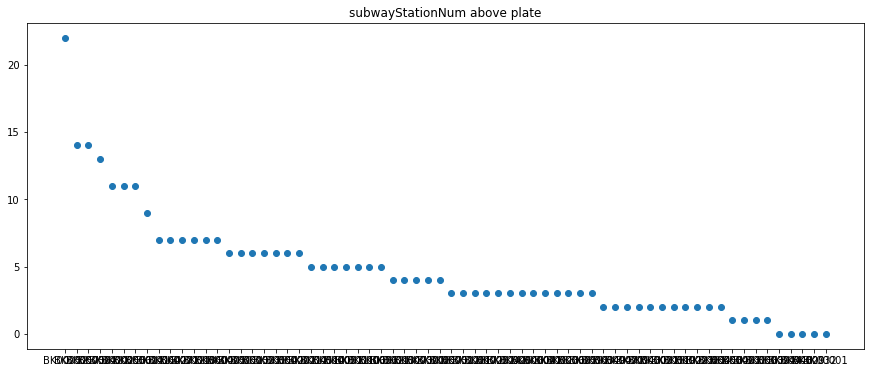

In [81]:
# 地铁站
paint('subwayStationNum')

{'BK00052': 142, 'BK00045': 99, 'BK00056': 98, 'BK00066': 74, 'BK00027': 72, 'BK00031': 71, 'BK00028': 69, 'BK00057': 65, 'BK00013': 64, 'BK00042': 62, 'BK00054': 61, 'BK00060': 61, 'BK00051': 60, 'BK00012': 59, 'BK00023': 57, 'BK00009': 53, 'BK00033': 53, 'BK00016': 52, 'BK00026': 50, 'BK00011': 48, 'BK00055': 48, 'BK00061': 48, 'BK00025': 47, 'BK00005': 47, 'BK00007': 47, 'BK00008': 47, 'BK00024': 45, 'BK00020': 44, 'BK00021': 44, 'BK00050': 43, 'BK00040': 41, 'BK00001': 41, 'BK00018': 39, 'BK00003': 38, 'BK00010': 37, 'BK00030': 32, 'BK00034': 32, 'BK00035': 30, 'BK00037': 30, 'BK00006': 29, 'BK00064': 28, 'BK00002': 28, 'BK00049': 26, 'BK00053': 24, 'BK00029': 24, 'BK00032': 24, 'BK00038': 23, 'BK00017': 22, 'BK00041': 21, 'BK00065': 21, 'BK00022': 21, 'BK00039': 21, 'BK00062': 20, 'BK00019': 18, 'BK00058': 18, 'BK00059': 16, 'BK00044': 15, 'BK00004': 14, 'BK00046': 13, 'BK00063': 13, 'BK00048': 11, 'BK00047': 10, 'BK00014': 10, 'BK00043': 10, 'BK00015': 9, 'BK00036': 9}


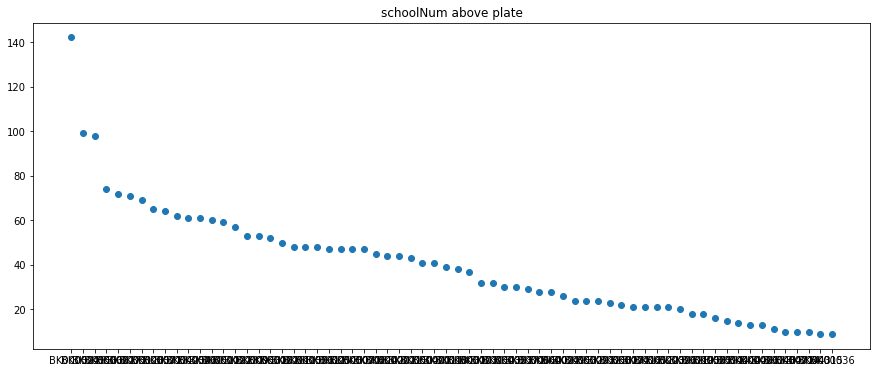

In [82]:
# 公立学校
paint('schoolNum')

{'BK00040': 24, 'BK00034': 16, 'BK00033': 15, 'BK00027': 13, 'BK00056': 13, 'BK00052': 12, 'BK00011': 11, 'BK00037': 11, 'BK00020': 10, 'BK00021': 10, 'BK00045': 9, 'BK00013': 9, 'BK00010': 9, 'BK00029': 9, 'BK00039': 9, 'BK00060': 9, 'BK00009': 8, 'BK00042': 8, 'BK00012': 8, 'BK00018': 8, 'BK00038': 8, 'BK00063': 8, 'BK00026': 7, 'BK00003': 7, 'BK00028': 6, 'BK00066': 6, 'BK00057': 6, 'BK00031': 5, 'BK00005': 5, 'BK00053': 5, 'BK00002': 5, 'BK00007': 5, 'BK00008': 5, 'BK00025': 4, 'BK00035': 4, 'BK00043': 3, 'BK00019': 3, 'BK00050': 2, 'BK00017': 2, 'BK00041': 2, 'BK00046': 2, 'BK00016': 2, 'BK00065': 2, 'BK00023': 2, 'BK00054': 2, 'BK00055': 2, 'BK00061': 2, 'BK00001': 2, 'BK00064': 1, 'BK00051': 1, 'BK00047': 1, 'BK00024': 1, 'BK00014': 1, 'BK00006': 1, 'BK00015': 1, 'BK00048': 1, 'BK00036': 1, 'BK00022': 1, 'BK00062': 1, 'BK00049': 0, 'BK00044': 0, 'BK00004': 0, 'BK00030': 0, 'BK00058': 0, 'BK00059': 0, 'BK00032': 0}


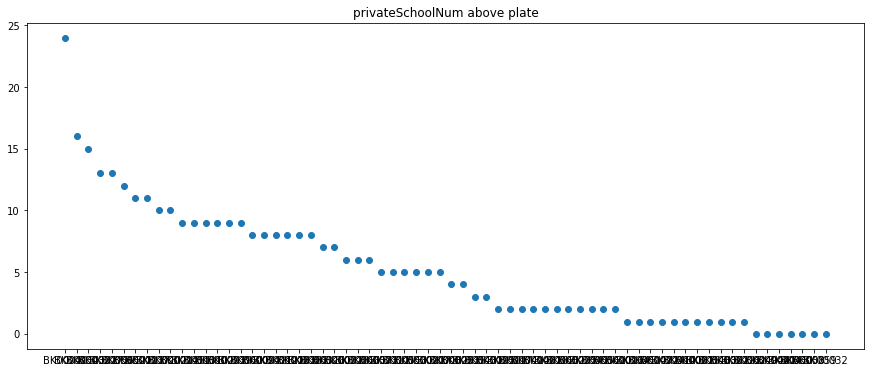

In [83]:
#私立学校
paint('privateSchoolNum')

{'BK00052': 14, 'BK00045': 11, 'BK00042': 9, 'BK00051': 8, 'BK00013': 8, 'BK00005': 8, 'BK00031': 6, 'BK00041': 6, 'BK00025': 6, 'BK00024': 6, 'BK00026': 6, 'BK00007': 6, 'BK00008': 6, 'BK00055': 6, 'BK00061': 6, 'BK00028': 5, 'BK00012': 5, 'BK00030': 5, 'BK00029': 5, 'BK00054': 5, 'BK00020': 5, 'BK00056': 5, 'BK00021': 5, 'BK00027': 4, 'BK00009': 4, 'BK00038': 4, 'BK00058': 4, 'BK00057': 4, 'BK00050': 3, 'BK00046': 3, 'BK00002': 3, 'BK00023': 3, 'BK00037': 3, 'BK00001': 3, 'BK00014': 2, 'BK00011': 2, 'BK00010': 2, 'BK00003': 2, 'BK00006': 2, 'BK00018': 2, 'BK00065': 2, 'BK00035': 2, 'BK00034': 2, 'BK00039': 2, 'BK00060': 2, 'BK00032': 2, 'BK00064': 1, 'BK00049': 1, 'BK00017': 1, 'BK00047': 1, 'BK00043': 1, 'BK00033': 1, 'BK00004': 1, 'BK00016': 1, 'BK00048': 1, 'BK00022': 1, 'BK00066': 1, 'BK00059': 1, 'BK00062': 1, 'BK00044': 0, 'BK00053': 0, 'BK00015': 0, 'BK00019': 0, 'BK00036': 0, 'BK00063': 0, 'BK00040': 0}


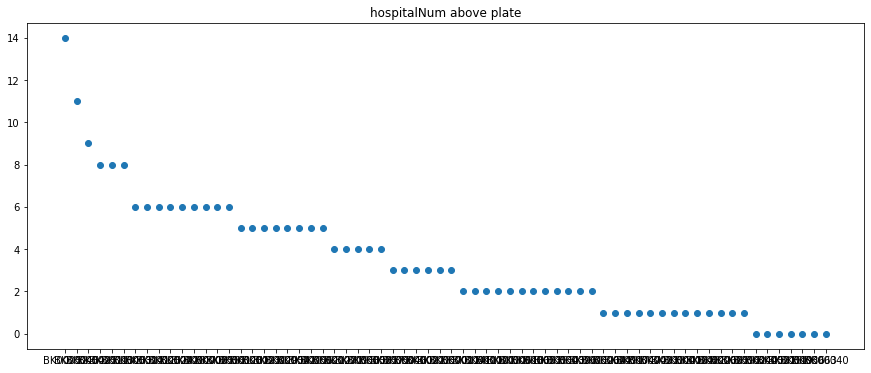

In [84]:
#医院
paint('hospitalNum')

{'BK00045': 174, 'BK00042': 145, 'BK00052': 118, 'BK00031': 106, 'BK00054': 94, 'BK00056': 88, 'BK00057': 85, 'BK00051': 83, 'BK00055': 69, 'BK00061': 69, 'BK00040': 67, 'BK00041': 65, 'BK00038': 55, 'BK00046': 54, 'BK00001': 52, 'BK00062': 49, 'BK00020': 48, 'BK00021': 48, 'BK00035': 47, 'BK00034': 41, 'BK00032': 41, 'BK00017': 40, 'BK00026': 40, 'BK00012': 40, 'BK00028': 39, 'BK00053': 39, 'BK00016': 39, 'BK00022': 39, 'BK00027': 37, 'BK00043': 37, 'BK00033': 36, 'BK00018': 35, 'BK00066': 35, 'BK00060': 35, 'BK00009': 34, 'BK00013': 34, 'BK00058': 34, 'BK00002': 33, 'BK00047': 31, 'BK00005': 31, 'BK00010': 31, 'BK00025': 29, 'BK00003': 28, 'BK00049': 27, 'BK00011': 27, 'BK00037': 27, 'BK00036': 25, 'BK00050': 24, 'BK00059': 23, 'BK00019': 22, 'BK00048': 22, 'BK00039': 22, 'BK00044': 21, 'BK00006': 20, 'BK00023': 20, 'BK00007': 19, 'BK00008': 19, 'BK00014': 17, 'BK00024': 15, 'BK00030': 15, 'BK00065': 15, 'BK00015': 13, 'BK00064': 12, 'BK00029': 11, 'BK00063': 11, 'BK00004': 8}


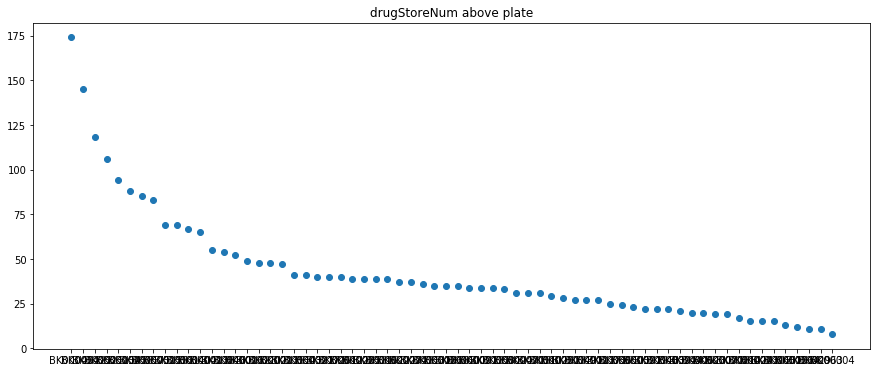

In [85]:
# DrugStoreNum——该板块药房数量　　　　　　　　
paint('drugStoreNum')

{'BK00045': 88, 'BK00042': 84, 'BK00060': 82, 'BK00037': 78, 'BK00052': 64, 'BK00026': 56, 'BK00056': 52, 'BK00057': 48, 'BK00006': 43, 'BK00040': 43, 'BK00055': 41, 'BK00061': 41, 'BK00053': 40, 'BK00007': 40, 'BK00008': 40, 'BK00024': 39, 'BK00027': 38, 'BK00025': 38, 'BK00020': 38, 'BK00021': 38, 'BK00054': 37, 'BK00031': 36, 'BK00050': 35, 'BK00005': 35, 'BK00010': 34, 'BK00033': 34, 'BK00013': 32, 'BK00051': 30, 'BK00018': 28, 'BK00039': 28, 'BK00028': 27, 'BK00041': 27, 'BK00017': 26, 'BK00011': 26, 'BK00035': 26, 'BK00046': 25, 'BK00012': 25, 'BK00034': 25, 'BK00003': 23, 'BK00062': 23, 'BK00038': 22, 'BK00066': 21, 'BK00019': 20, 'BK00065': 20, 'BK00001': 19, 'BK00023': 18, 'BK00047': 16, 'BK00009': 16, 'BK00043': 16, 'BK00063': 16, 'BK00064': 15, 'BK00048': 14, 'BK00004': 13, 'BK00022': 13, 'BK00030': 12, 'BK00014': 10, 'BK00002': 8, 'BK00036': 8, 'BK00032': 8, 'BK00029': 6, 'BK00058': 6, 'BK00049': 5, 'BK00044': 5, 'BK00016': 5, 'BK00059': 5, 'BK00015': 1}


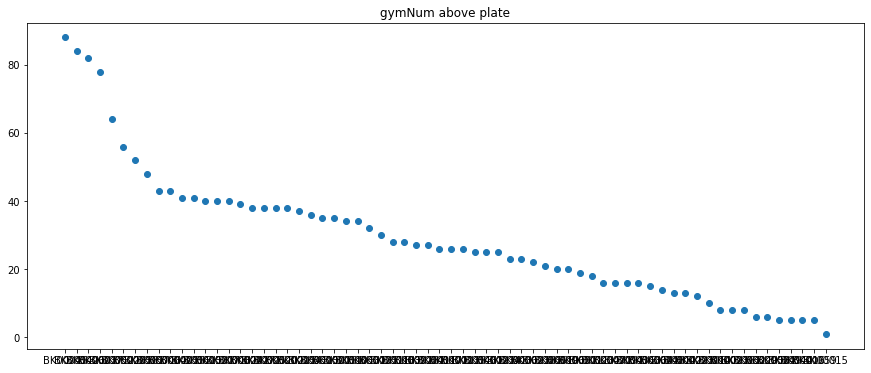

In [86]:
# gymNum——该板块健身中心数量　　　　　　　　　　
paint('gymNum')

{'BK00060': 207, 'BK00045': 119, 'BK00025': 98, 'BK00052': 95, 'BK00057': 92, 'BK00042': 91, 'BK00031': 86, 'BK00007': 86, 'BK00008': 86, 'BK00056': 75, 'BK00024': 69, 'BK00026': 62, 'BK00013': 53, 'BK00033': 52, 'BK00027': 50, 'BK00023': 50, 'BK00054': 50, 'BK00001': 49, 'BK00051': 47, 'BK00028': 46, 'BK00041': 43, 'BK00005': 43, 'BK00053': 43, 'BK00037': 43, 'BK00012': 42, 'BK00010': 41, 'BK00011': 38, 'BK00050': 37, 'BK00020': 35, 'BK00040': 35, 'BK00021': 35, 'BK00055': 34, 'BK00061': 34, 'BK00006': 33, 'BK00058': 32, 'BK00034': 31, 'BK00066': 31, 'BK00062': 31, 'BK00003': 29, 'BK00018': 29, 'BK00016': 28, 'BK00019': 28, 'BK00030': 28, 'BK00029': 27, 'BK00032': 25, 'BK00038': 24, 'BK00039': 24, 'BK00009': 23, 'BK00035': 22, 'BK00017': 21, 'BK00046': 21, 'BK00022': 21, 'BK00002': 20, 'BK00043': 18, 'BK00064': 16, 'BK00049': 16, 'BK00014': 16, 'BK00065': 15, 'BK00036': 14, 'BK00047': 13, 'BK00048': 12, 'BK00004': 11, 'BK00044': 10, 'BK00059': 9, 'BK00015': 7, 'BK00063': 7}


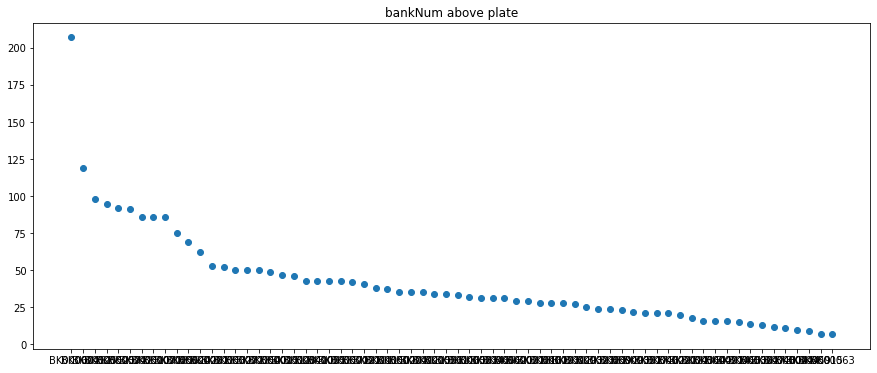

In [87]:
# bankNum——该板块银行数量　　　　　　　　　　　
paint('bankNum')

{'BK00045': 824, 'BK00042': 671, 'BK00031': 598, 'BK00052': 483, 'BK00054': 419, 'BK00057': 404, 'BK00051': 358, 'BK00012': 354, 'BK00001': 353, 'BK00056': 341, 'BK00032': 340, 'BK00020': 318, 'BK00021': 318, 'BK00027': 306, 'BK00041': 301, 'BK00025': 245, 'BK00018': 243, 'BK00055': 236, 'BK00061': 236, 'BK00026': 231, 'BK00016': 224, 'BK00023': 224, 'BK00040': 224, 'BK00013': 223, 'BK00038': 215, 'BK00062': 215, 'BK00035': 214, 'BK00028': 211, 'BK00022': 206, 'BK00005': 200, 'BK00060': 199, 'BK00030': 189, 'BK00034': 189, 'BK00047': 175, 'BK00017': 171, 'BK00046': 167, 'BK00049': 163, 'BK00033': 162, 'BK00037': 160, 'BK00009': 154, 'BK00010': 154, 'BK00053': 154, 'BK00002': 151, 'BK00043': 150, 'BK00066': 143, 'BK00011': 142, 'BK00024': 140, 'BK00058': 134, 'BK00014': 118, 'BK00036': 112, 'BK00065': 109, 'BK00044': 100, 'BK00006': 100, 'BK00048': 99, 'BK00019': 97, 'BK00003': 96, 'BK00007': 90, 'BK00008': 90, 'BK00050': 85, 'BK00015': 84, 'BK00039': 80, 'BK00059': 77, 'BK00064': 76, '

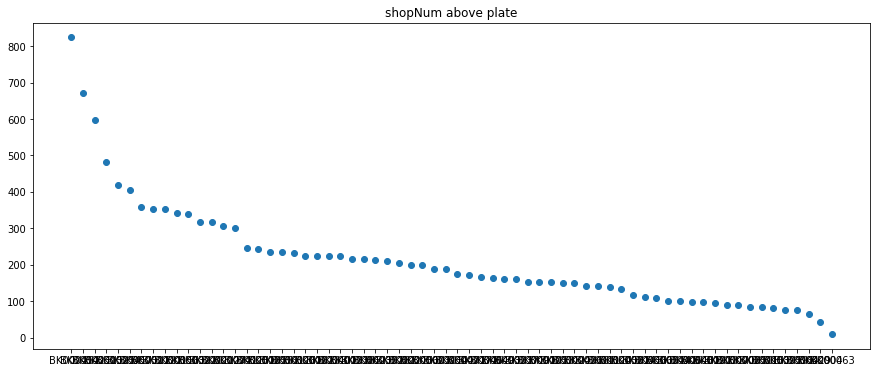

In [88]:
# 购物商店
paint('shopNum')

{'BK00042': 30, 'BK00057': 26, 'BK00045': 24, 'BK00052': 23, 'BK00054': 14, 'BK00060': 13, 'BK00020': 12, 'BK00021': 12, 'BK00056': 11, 'BK00062': 11, 'BK00041': 10, 'BK00033': 8, 'BK00053': 8, 'BK00002': 8, 'BK00022': 8, 'BK00038': 8, 'BK00055': 8, 'BK00061': 8, 'BK00031': 7, 'BK00013': 7, 'BK00007': 7, 'BK00008': 7, 'BK00040': 7, 'BK00049': 6, 'BK00050': 6, 'BK00026': 6, 'BK00043': 6, 'BK00012': 6, 'BK00065': 6, 'BK00036': 6, 'BK00034': 6, 'BK00058': 6, 'BK00064': 5, 'BK00044': 5, 'BK00027': 5, 'BK00025': 5, 'BK00006': 5, 'BK00004': 5, 'BK00015': 5, 'BK00016': 5, 'BK00018': 5, 'BK00035': 5, 'BK00001': 5, 'BK00009': 4, 'BK00003': 4, 'BK00048': 4, 'BK00029': 4, 'BK00023': 4, 'BK00032': 4, 'BK00051': 3, 'BK00028': 3, 'BK00017': 3, 'BK00005': 3, 'BK00010': 3, 'BK00030': 3, 'BK00037': 3, 'BK00011': 2, 'BK00019': 2, 'BK00066': 2, 'BK00047': 1, 'BK00024': 1, 'BK00014': 1, 'BK00039': 1, 'BK00059': 1, 'BK00046': 0, 'BK00063': 0}


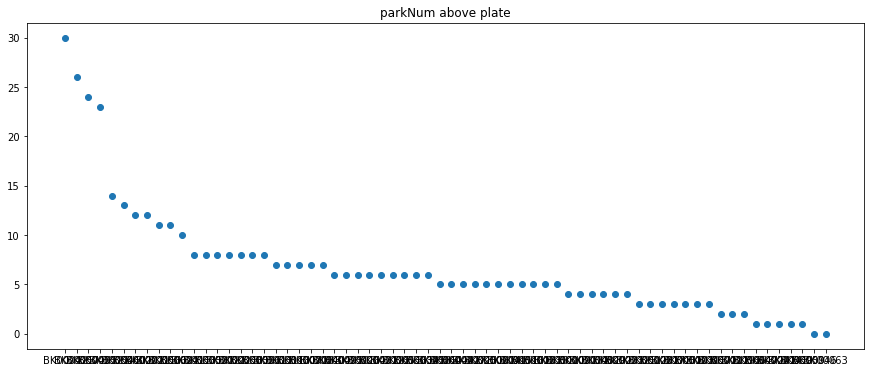

In [89]:
#公园
paint('parkNum')

{'BK00045': 19, 'BK00042': 16, 'BK00060': 15, 'BK00025': 14, 'BK00031': 12, 'BK00027': 11, 'BK00054': 10, 'BK00001': 10, 'BK00038': 9, 'BK00034': 9, 'BK00043': 8, 'BK00037': 8, 'BK00057': 8, 'BK00041': 7, 'BK00053': 7, 'BK00006': 7, 'BK00019': 7, 'BK00020': 7, 'BK00056': 7, 'BK00062': 7, 'BK00021': 7, 'BK00005': 6, 'BK00010': 6, 'BK00033': 6, 'BK00007': 6, 'BK00015': 6, 'BK00008': 6, 'BK00040': 6, 'BK00052': 5, 'BK00026': 5, 'BK00003': 5, 'BK00018': 5, 'BK00023': 5, 'BK00066': 5, 'BK00055': 5, 'BK00061': 5, 'BK00049': 4, 'BK00050': 4, 'BK00024': 4, 'BK00012': 4, 'BK00035': 4, 'BK00022': 4, 'BK00058': 4, 'BK00064': 3, 'BK00017': 3, 'BK00011': 3, 'BK00059': 3, 'BK00044': 2, 'BK00028': 2, 'BK00047': 2, 'BK00014': 2, 'BK00046': 2, 'BK00004': 2, 'BK00002': 2, 'BK00048': 2, 'BK00029': 2, 'BK00039': 2, 'BK00051': 1, 'BK00009': 1, 'BK00013': 1, 'BK00030': 1, 'BK00016': 0, 'BK00065': 0, 'BK00036': 0, 'BK00063': 0, 'BK00032': 0}


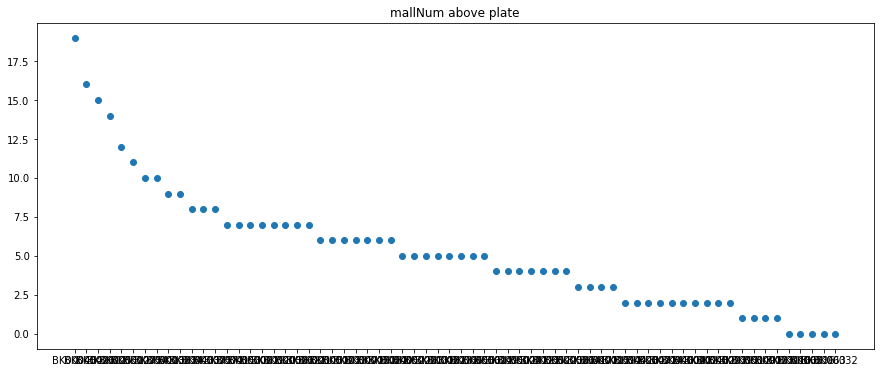

In [90]:
# 购物中心
paint('mallNum')

# 上面这些我故意选取的地区和一些市场学校等场所的分布，可以发现bk0045总体来说是最好的

{'BK00045': 299, 'BK00042': 159, 'BK00052': 154, 'BK00057': 145, 'BK00051': 131, 'BK00056': 130, 'BK00054': 126, 'BK00031': 119, 'BK00041': 109, 'BK00020': 103, 'BK00021': 103, 'BK00046': 100, 'BK00062': 98, 'BK00038': 88, 'BK00032': 83, 'BK00055': 78, 'BK00061': 78, 'BK00040': 75, 'BK00017': 74, 'BK00001': 71, 'BK00027': 63, 'BK00012': 63, 'BK00018': 63, 'BK00047': 61, 'BK00035': 60, 'BK00034': 58, 'BK00026': 56, 'BK00013': 56, 'BK00053': 56, 'BK00022': 56, 'BK00060': 55, 'BK00028': 53, 'BK00049': 51, 'BK00058': 51, 'BK00066': 51, 'BK00016': 49, 'BK00002': 48, 'BK00033': 47, 'BK00043': 46, 'BK00037': 43, 'BK00011': 42, 'BK00014': 41, 'BK00065': 38, 'BK00036': 38, 'BK00059': 38, 'BK00009': 37, 'BK00010': 36, 'BK00007': 35, 'BK00008': 35, 'BK00044': 34, 'BK00003': 32, 'BK00019': 32, 'BK00005': 31, 'BK00048': 31, 'BK00050': 30, 'BK00025': 29, 'BK00006': 23, 'BK00064': 22, 'BK00030': 22, 'BK00024': 21, 'BK00023': 21, 'BK00039': 21, 'BK00015': 16, 'BK00029': 15, 'BK00063': 11, 'BK00004': 5

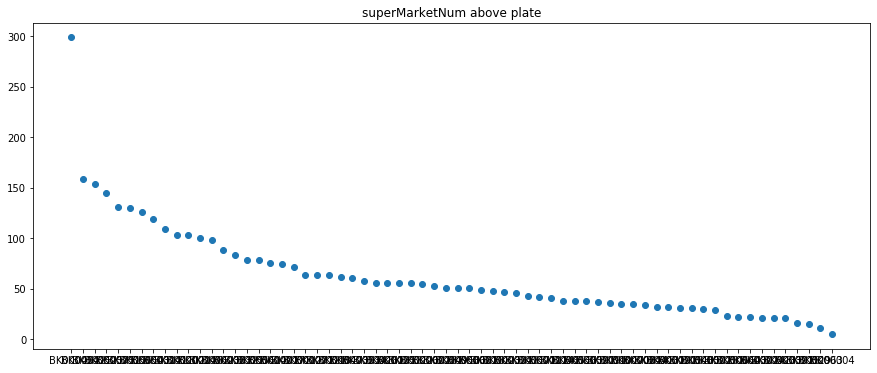

In [91]:
# 超级市场
paint('superMarketNum')

In [92]:
data.isnull()

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41436,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41437,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41438,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
# 缺失值定位
data.isnull().sum()

ID                     0
area                   0
rentType               0
houseType              0
houseFloor             0
totalFloor             0
houseToward            0
houseDecoration        0
communityName          0
city                   0
region                 0
plate                  0
buildYear              0
saleSecHouseNum        0
subwayStationNum       0
busStationNum          0
interSchoolNum         0
schoolNum              0
privateSchoolNum       0
hospitalNum            0
drugStoreNum           0
gymNum                 0
bankNum                0
shopNum                0
parkNum                0
mallNum                0
superMarketNum         0
totalTradeMoney        0
totalTradeArea         0
tradeMeanPrice         0
tradeSecNum            0
totalNewTradeMoney     0
totalNewTradeArea      0
tradeNewMeanPrice      0
tradeNewNum            0
remainNewNum           0
supplyNewNum           0
supplyLandNum          0
supplyLandArea         0
tradeLandNum           0


In [94]:
# 这里我们可以知道pv和uv有一些缺失值
#参照答案的风格定位值
missing_values = pd.DataFrame(data.isnull().sum(),columns=['missingNum'])
missing_values['existNum'] = len(data)-missing_values ['missingNum']
missing_values['sum'] = len(data)
#太小了,使用百分比形式
missing_values['missingRadio'] = missing_values['missingNum']/len(data)*100
missing_values['dtype'] = data.dtypes# 数据类型查看
missing_values = missing_values[missing_values['missingNum']>0]
missing_values
# 通过下图中，我们再查看csv的文件，发现这些数据是属于同一行的，所以我们下次准备去除

,missingNum,existNum,sum,missingRadio,dtype
pv,18,41422,41440,0.043436,float64
uv,18,41422,41440,0.043436,float64


In [95]:
print(data['pv'].mean())
data.isnull().sum()
#我们先看看均值

26945.663512143306


ID                     0
area                   0
rentType               0
houseType              0
houseFloor             0
totalFloor             0
houseToward            0
houseDecoration        0
communityName          0
city                   0
region                 0
plate                  0
buildYear              0
saleSecHouseNum        0
subwayStationNum       0
busStationNum          0
interSchoolNum         0
schoolNum              0
privateSchoolNum       0
hospitalNum            0
drugStoreNum           0
gymNum                 0
bankNum                0
shopNum                0
parkNum                0
mallNum                0
superMarketNum         0
totalTradeMoney        0
totalTradeArea         0
tradeMeanPrice         0
tradeSecNum            0
totalNewTradeMoney     0
totalNewTradeArea      0
tradeNewMeanPrice      0
tradeNewNum            0
remainNewNum           0
supplyNewNum           0
supplyLandNum          0
supplyLandArea         0
tradeLandNum           0


In [96]:
# print(data['pv'].isnull())
# for i in range(len(data['pv'].isnull())):
#     if(data['pv'].isnull()[i]==True):
        
# print(i)
# data
data = data.fillna(data.mean()) #填补空缺值
data.isnull().sum()

ID                    0
area                  0
rentType              0
houseType             0
houseFloor            0
totalFloor            0
houseToward           0
houseDecoration       0
communityName         0
city                  0
region                0
plate                 0
buildYear             0
saleSecHouseNum       0
subwayStationNum      0
busStationNum         0
interSchoolNum        0
schoolNum             0
privateSchoolNum      0
hospitalNum           0
drugStoreNum          0
gymNum                0
bankNum               0
shopNum               0
parkNum               0
mallNum               0
superMarketNum        0
totalTradeMoney       0
totalTradeArea        0
tradeMeanPrice        0
tradeSecNum           0
totalNewTradeMoney    0
totalNewTradeArea     0
tradeNewMeanPrice     0
tradeNewNum           0
remainNewNum          0
supplyNewNum          0
supplyLandNum         0
supplyLandArea        0
tradeLandNum          0
tradeLandArea         0
landTotalPrice  

rentType的特征分布如下：
未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64


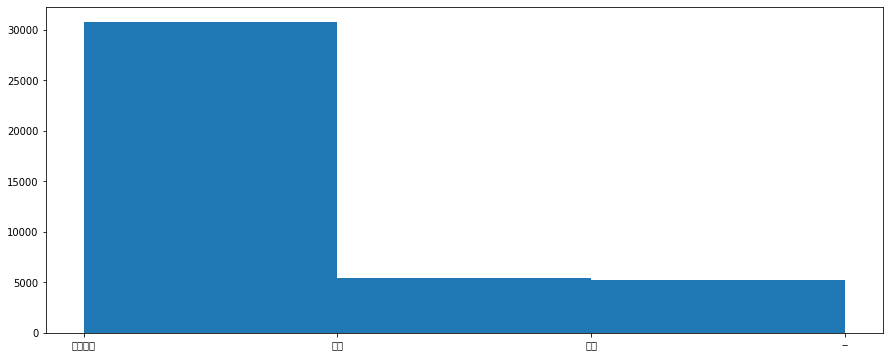

<Figure size 1080x288 with 0 Axes>

houseType的特征分布如下：
1室1厅1卫    9805
2室1厅1卫    8512
2室2厅1卫    6783
3室1厅1卫    3992
3室2厅2卫    2737
          ... 
6室2厅5卫       1
8室2厅4卫       1
7室1厅7卫       1
8室3厅4卫       1
6室2厅6卫       1
Name: houseType, Length: 104, dtype: int64


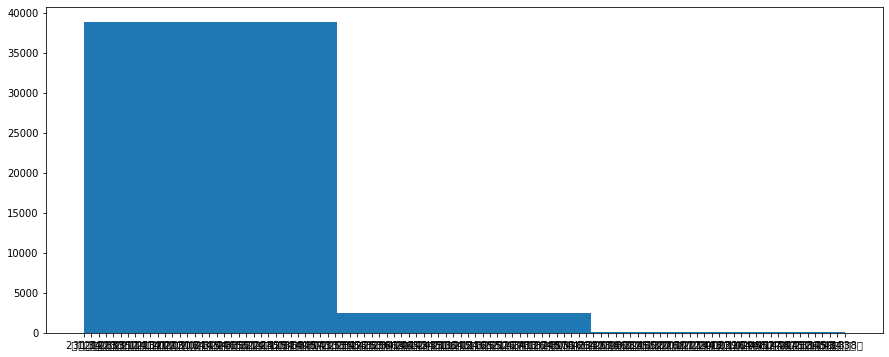

<Figure size 1080x288 with 0 Axes>

houseFloor的特征分布如下：
中    15458
高    14066
低    11916
Name: houseFloor, dtype: int64


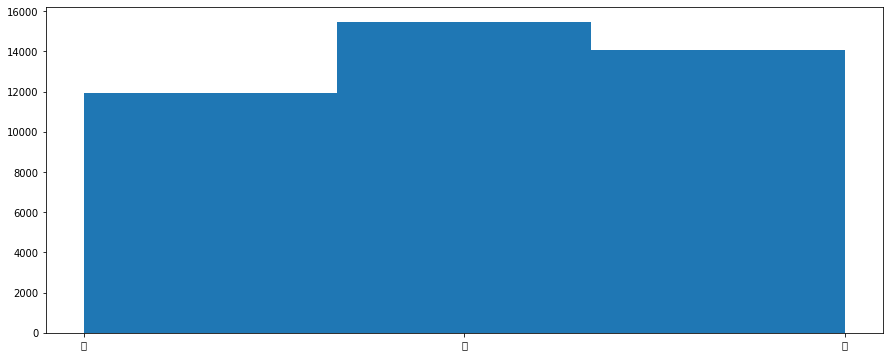

<Figure size 1080x288 with 0 Axes>

region的特征分布如下：
RG00002    11437
RG00005     5739
RG00003     4186
RG00010     3640
RG00012     3368
RG00004     3333
RG00006     1961
RG00007     1610
RG00008     1250
RG00013     1215
RG00001     1157
RG00014     1069
RG00011      793
RG00009      681
RG00015        1
Name: region, dtype: int64


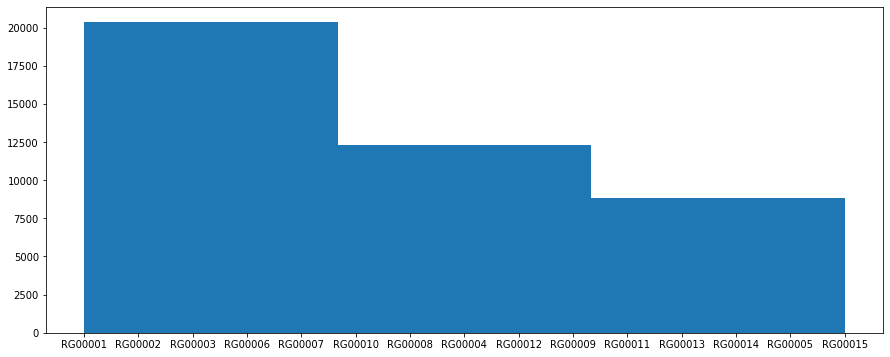

<Figure size 1080x288 with 0 Axes>

plate的特征分布如下：
BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
           ... 
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plate, Length: 66, dtype: int64


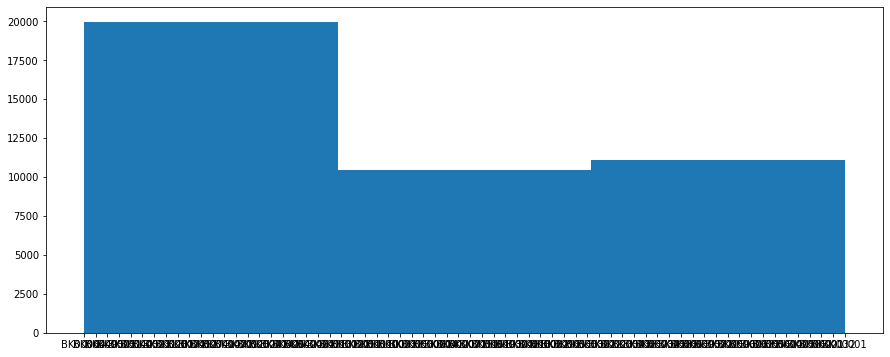

<Figure size 1080x288 with 0 Axes>

houseToward的特征分布如下：
南       34377
南北       2254
北        2043
暂无数据      963
东南        655
东         552
西         264
西南        250
西北         58
东西         24
Name: houseToward, dtype: int64


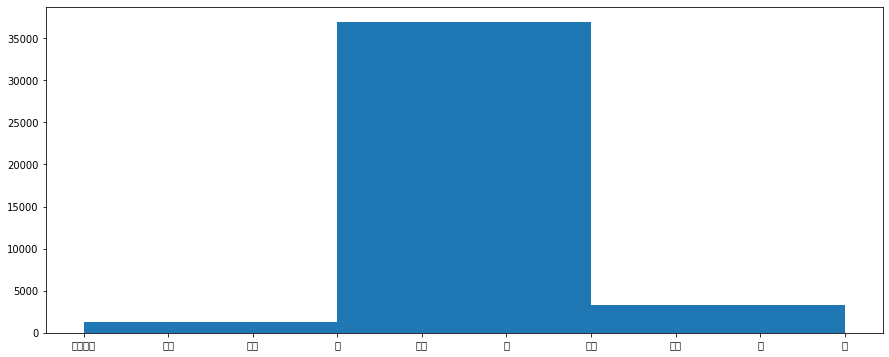

<Figure size 1080x288 with 0 Axes>

houseDecoration的特征分布如下：
其他    29040
精装    10918
简装     1171
毛坯      311
Name: houseDecoration, dtype: int64


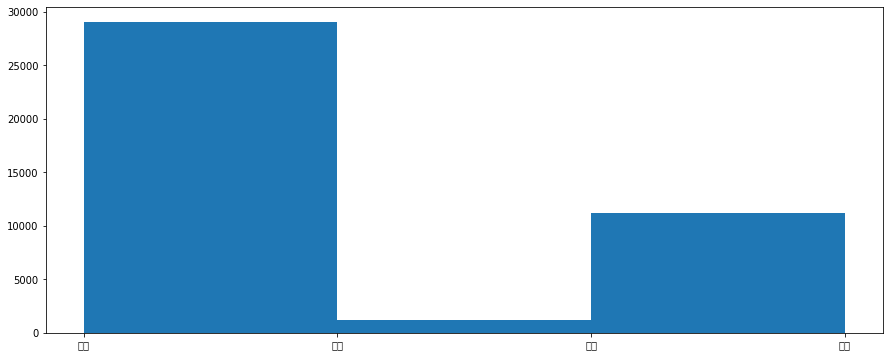

<Figure size 1080x288 with 0 Axes>

communityName的特征分布如下：
XQ01834    358
XQ01274    192
XQ02273    188
XQ03110    185
XQ02337    173
          ... 
XQ02484      1
XQ02672      1
XQ00390      1
XQ00560      1
XQ02928      1
Name: communityName, Length: 4236, dtype: int64
city的特征分布如下：
SH    41440
Name: city, dtype: int64


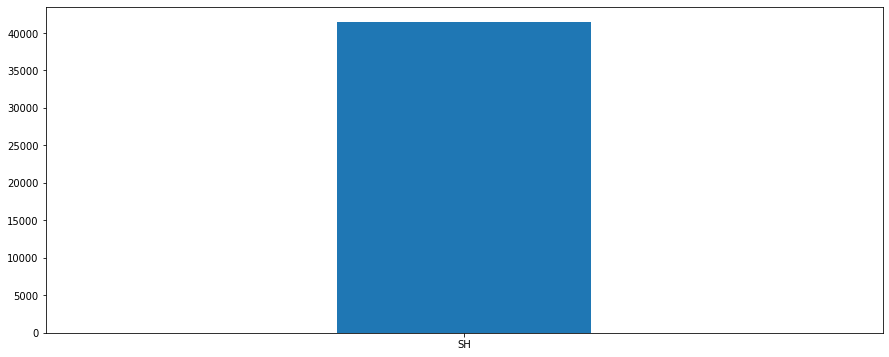

<Figure size 1080x288 with 0 Axes>

region的特征分布如下：
RG00002    11437
RG00005     5739
RG00003     4186
RG00010     3640
RG00012     3368
RG00004     3333
RG00006     1961
RG00007     1610
RG00008     1250
RG00013     1215
RG00001     1157
RG00014     1069
RG00011      793
RG00009      681
RG00015        1
Name: region, dtype: int64


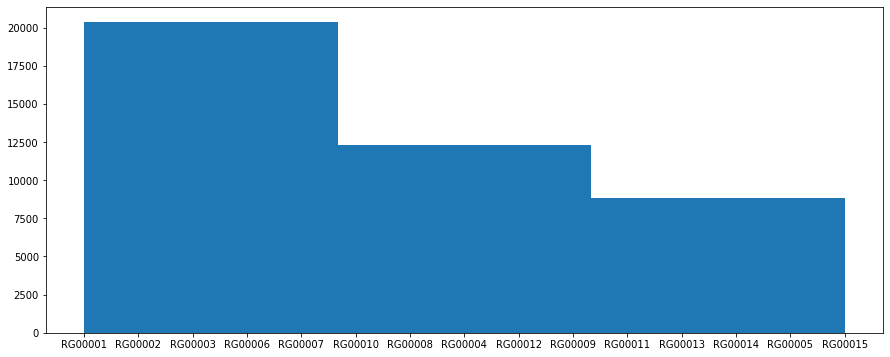

<Figure size 1080x288 with 0 Axes>

plate的特征分布如下：
BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
           ... 
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plate, Length: 66, dtype: int64


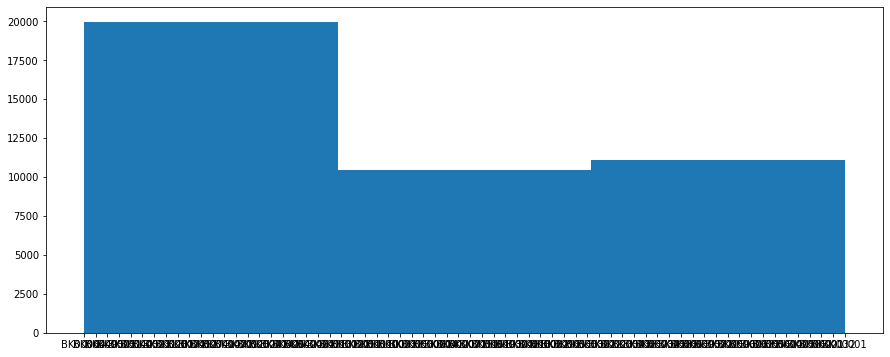

<Figure size 1080x288 with 0 Axes>

buildYear的特征分布如下：
1994    2851
暂无信息    2808
2006    2007
2007    1851
2008    1849
        ... 
1939       2
1961       2
1962       1
1951       1
1950       1
Name: buildYear, Length: 80, dtype: int64


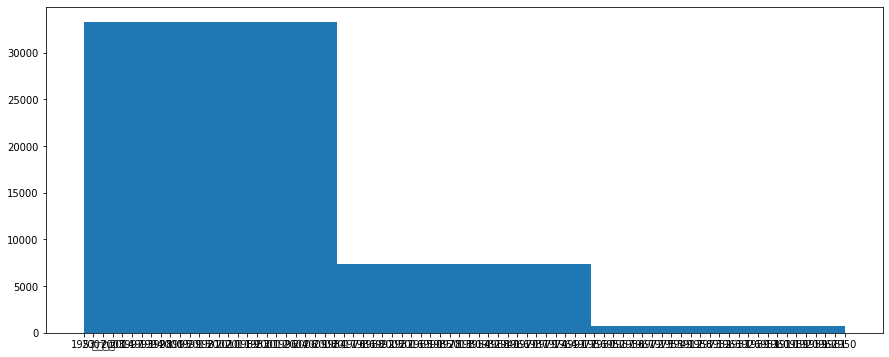

<Figure size 1080x288 with 0 Axes>

In [97]:
for i in['rentType', 'houseType', 'houseFloor', 'region', 'plate', 'houseToward', 'houseDecoration',
    'communityName','city','region','plate','buildYear']:
    print(i + "的特征分布如下：")
    print(data[i].value_counts())
    #调节具体参数
#bins调节横坐标分区个数，alpha参数用来设置透明度
# plt.hist(data, bins=30, normed=True, alpha=0.5, histtype='stepfilled',
#          color='steelblue', edgecolor='none'）
    if i=="communityName":
        continue
    plt.figure(figsize=(15,6))
    plt.hist(data[i],bins=3)#直
    plt.figure(figsize=(15,4))
    plt.show()

In [98]:
# 对非数值文件进行频次分
for i in['rentType', 'houseType', 'houseFloor', 'region', 'plate', 'houseToward', 'houseDecoration',
    'communityName','city','region','plate','buildYear']:
    da = pd.DataFrame(data[i].value_counts()).reset_index()
    da.columns = [i,'counts']
    print(da[da['counts']>100])

  rentType  counts
0     未知方式   30759
1       整租    5472
2       合租    5204
   houseType  counts
0     1室1厅1卫    9805
1     2室1厅1卫    8512
2     2室2厅1卫    6783
3     3室1厅1卫    3992
4     3室2厅2卫    2737
5     4室1厅1卫    1957
6     3室2厅1卫    1920
7     1室0厅1卫    1286
8     1室2厅1卫     933
9     2室2厅2卫     881
10    4室2厅2卫     435
11    2室0厅1卫     419
12    4室2厅3卫     273
13    5室1厅1卫     197
14    2室1厅2卫     155
15    3室2厅3卫     149
16    3室1厅2卫     135
  houseFloor  counts
0          中   15458
1          高   14066
2          低   11916
     region  counts
0   RG00002   11437
1   RG00005    5739
2   RG00003    4186
3   RG00010    3640
4   RG00012    3368
5   RG00004    3333
6   RG00006    1961
7   RG00007    1610
8   RG00008    1250
9   RG00013    1215
10  RG00001    1157
11  RG00014    1069
12  RG00011     793
13  RG00009     681
      plate  counts
0   BK00031    1958
1   BK00033    1837
2   BK00045    1816
3   BK00055    1566
4   BK00056    1516
5   BK00052    1375
6   BK00017    1305
7 

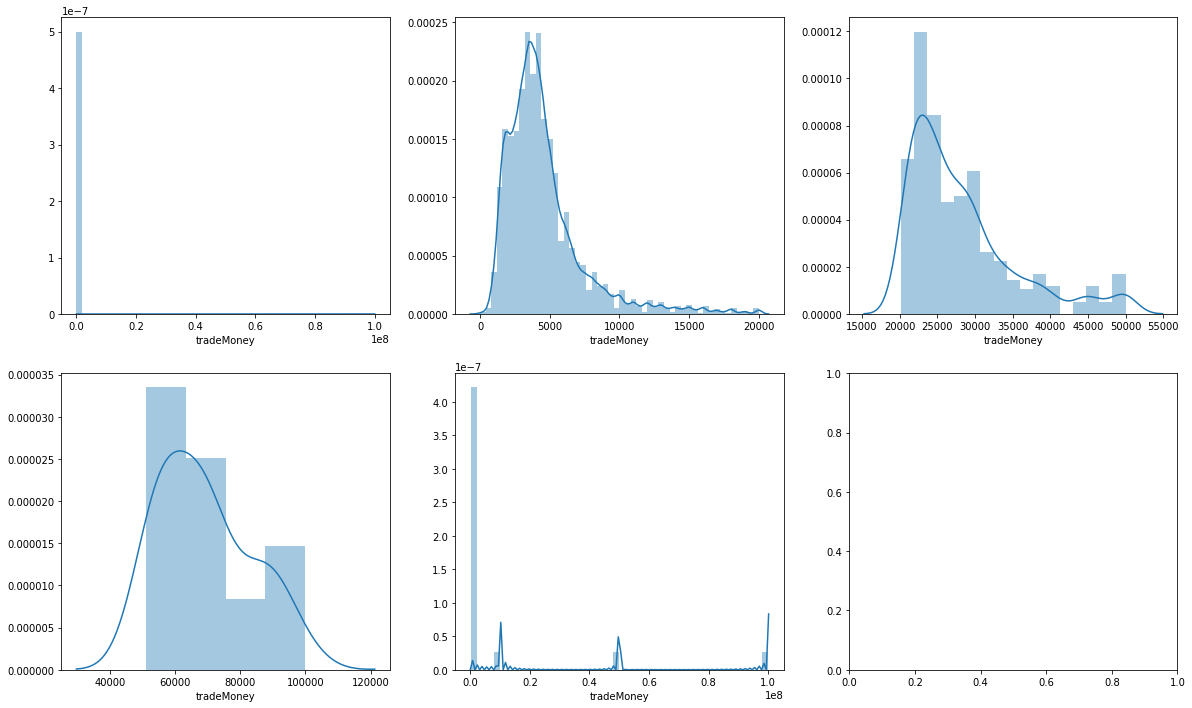

In [99]:
# 目标label值进行分析,sns是一个非常好的分布包
# Labe 分布
fig,axes = plt.subplots(2,3)
fig.set_size_inches(20,12)
sns.distplot(data['tradeMoney'],ax=axes[0][0])
sns.distplot(data[(data['tradeMoney']<=20000)]['tradeMoney'],ax=axes[0][1])
sns.distplot(data[(data['tradeMoney']>20000)&(data['tradeMoney']<=50000)]['tradeMoney'],ax=axes[0][2])
sns.distplot(data[(data['tradeMoney']>50000)&(data['tradeMoney']<=100000)]['tradeMoney'],ax=axes[1][0])
sns.distplot(data[(data['tradeMoney']>100000)]['tradeMoney'],ax=axes[1][1])

In [100]:
print('money_all',len(data['tradeMoney']))
print('money<10000',len(data[(data['tradeMoney']<=10000)]))
print("10000<money<=20000",len(data[(data['tradeMoney']>10000)&(data['tradeMoney']<=20000)]['tradeMoney']))
print("20000<money<=50000",len(data[(data['tradeMoney']>20000)&(data['tradeMoney']<=50000)]['tradeMoney']))
print("50000<money<=100000",len(data[(data['tradeMoney']>50000)&(data['tradeMoney']<=100000)]['tradeMoney']))
print("100000<money",len(data[(data['tradeMoney']>100000)]['tradeMoney']))

money_all 41440
money<10000 38964
10000<money<=20000 1985
20000<money<=50000 433
50000<money<=100000 39
100000<money 19


In [101]:
# 对房屋的处理数据将房间，客厅，卫生间分开来
room = []
living_room = []
bathroom = []
for i in data['houseType']:
    room.append(float(i.split('室')[0]))
    living_room.append(float(i.split('室')[-1].split('厅')[0]))
    bathroom.append(float(i.split('室')[-1].split('厅')[0].split('卫')[0]))
data['roomNum'] = room
data['living_room'] = living_room
data['bathroom'] = bathroom
data = data.drop(['houseType'],axis=1)
data

,ID,area,rentType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,region,...,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,roomNum,living_room,bathroom
0,100309852,68.06,未知方式,低,16,暂无数据,其他,XQ00051,SH,RG00001,...,614,111546,1124.0,284.0,0,2018/11/28,2000.0,2.0,1.0,1.0
1,100307942,125.55,未知方式,中,14,暂无数据,简装,XQ00130,SH,RG00002,...,148,157552,701.0,22.0,1,2018/12/16,2000.0,3.0,2.0,2.0
2,100307764,132.00,未知方式,低,32,暂无数据,其他,XQ00179,SH,RG00002,...,520,131744,57.0,20.0,1,2018/12/22,16000.0,3.0,2.0,2.0
3,100306518,57.00,未知方式,中,17,暂无数据,精装,XQ00313,SH,RG00002,...,1665,253337,888.0,279.0,9,2018/12/21,1600.0,1.0,1.0,1.0
4,100305262,129.00,未知方式,低,2,暂无数据,毛坯,XQ01257,SH,RG00003,...,117,125309,2038.0,480.0,0,2018/11/18,2900.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41435,100000438,10.00,合租,高,11,北,精装,XQ01209,SH,RG00002,...,0,245872,29635.0,2662.0,0,2018/2/5,2190.0,4.0,1.0,1.0
41436,100000201,7.10,合租,中,6,北,精装,XQ00853,SH,RG00002,...,0,306857,28213.0,2446.0,0,2018/1/22,2090.0,3.0,1.0,1.0
41437,100000198,9.20,合租,高,18,北,精装,XQ00852,SH,RG00002,...,0,306857,19231.0,2016.0,0,2018/2/8,3190.0,4.0,1.0,1.0
41438,100000182,14.10,合租,低,8,北,精装,XQ00791,SH,RG00002,...,0,306857,17471.0,2554.0,0,2018/3/22,2460.0,4.0,1.0,1.0


In [102]:
#楼层低和高和totalFloor有关系，有大小
# res=[]
# for i in range(len(data['houseFloor'])):
# #     print(i)
# #     print(type(i))
#     if(data['houseFloor'][i]=='低'):
#        res.append(1)
#     elif(i=='中'):
#         res.append(2)
#     else:
#         res.append(3)
# data['houseFloor'] = room
# data = data.infer_objects()
# data.info()
# 尝试一下后，发现楼层高低是通过楼层决定的，那么可以删除
data = data.drop(['houseFloor'],axis=1)
data

,ID,area,rentType,totalFloor,houseToward,houseDecoration,communityName,city,region,plate,...,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,roomNum,living_room,bathroom
0,100309852,68.06,未知方式,16,暂无数据,其他,XQ00051,SH,RG00001,BK00064,...,614,111546,1124.0,284.0,0,2018/11/28,2000.0,2.0,1.0,1.0
1,100307942,125.55,未知方式,14,暂无数据,简装,XQ00130,SH,RG00002,BK00049,...,148,157552,701.0,22.0,1,2018/12/16,2000.0,3.0,2.0,2.0
2,100307764,132.00,未知方式,32,暂无数据,其他,XQ00179,SH,RG00002,BK00050,...,520,131744,57.0,20.0,1,2018/12/22,16000.0,3.0,2.0,2.0
3,100306518,57.00,未知方式,17,暂无数据,精装,XQ00313,SH,RG00002,BK00051,...,1665,253337,888.0,279.0,9,2018/12/21,1600.0,1.0,1.0,1.0
4,100305262,129.00,未知方式,2,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,...,117,125309,2038.0,480.0,0,2018/11/18,2900.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41435,100000438,10.00,合租,11,北,精装,XQ01209,SH,RG00002,BK00062,...,0,245872,29635.0,2662.0,0,2018/2/5,2190.0,4.0,1.0,1.0
41436,100000201,7.10,合租,6,北,精装,XQ00853,SH,RG00002,BK00055,...,0,306857,28213.0,2446.0,0,2018/1/22,2090.0,3.0,1.0,1.0
41437,100000198,9.20,合租,18,北,精装,XQ00852,SH,RG00002,BK00055,...,0,306857,19231.0,2016.0,0,2018/2/8,3190.0,4.0,1.0,1.0
41438,100000182,14.10,合租,8,北,精装,XQ00791,SH,RG00002,BK00055,...,0,306857,17471.0,2554.0,0,2018/3/22,2460.0,4.0,1.0,1.0


In [103]:
# id是唯一属性，可以删除
data = data.drop(['ID'],axis = 1)
data

,area,rentType,totalFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,...,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,roomNum,living_room,bathroom
0,68.06,未知方式,16,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,...,614,111546,1124.0,284.0,0,2018/11/28,2000.0,2.0,1.0,1.0
1,125.55,未知方式,14,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,...,148,157552,701.0,22.0,1,2018/12/16,2000.0,3.0,2.0,2.0
2,132.00,未知方式,32,暂无数据,其他,XQ00179,SH,RG00002,BK00050,暂无信息,...,520,131744,57.0,20.0,1,2018/12/22,16000.0,3.0,2.0,2.0
3,57.00,未知方式,17,暂无数据,精装,XQ00313,SH,RG00002,BK00051,暂无信息,...,1665,253337,888.0,279.0,9,2018/12/21,1600.0,1.0,1.0,1.0
4,129.00,未知方式,2,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,暂无信息,...,117,125309,2038.0,480.0,0,2018/11/18,2900.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41435,10.00,合租,11,北,精装,XQ01209,SH,RG00002,BK00062,2009,...,0,245872,29635.0,2662.0,0,2018/2/5,2190.0,4.0,1.0,1.0
41436,7.10,合租,6,北,精装,XQ00853,SH,RG00002,BK00055,2004,...,0,306857,28213.0,2446.0,0,2018/1/22,2090.0,3.0,1.0,1.0
41437,9.20,合租,18,北,精装,XQ00852,SH,RG00002,BK00055,2000,...,0,306857,19231.0,2016.0,0,2018/2/8,3190.0,4.0,1.0,1.0
41438,14.10,合租,8,北,精装,XQ00791,SH,RG00002,BK00055,1998,...,0,306857,17471.0,2554.0,0,2018/3/22,2460.0,4.0,1.0,1.0


In [104]:
pd.get_dummies(data.rentType)
#这里我们发现，竟然还有缺失值，上面一部分我直接去掉了，这里由于样本过多，我可以选择删除5个未知的

,--,合租,整租,未知方式
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
41435,0,1,0,0
41436,0,1,0,0
41437,0,1,0,0
41438,0,1,0,0


In [105]:
print(data['rentType'].value_counts())# 统计租用方式的dict
# 通过中位数发现我们可以使用未知方式填充
for i in range(len(data['rentType'])):
    if(data['rentType'][i]=='--'):
        data['rentType'][i] = '未知方式'
print(data['rentType'].value_counts())# 统计租用方式的dict

未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64
未知方式    30764
整租       5472
合租       5204
Name: rentType, dtype: int64


In [106]:
pd.get_dummies(data.rentType)
data = data.join(pd.get_dummies(data.rentType))
data.drop(['rentType'],axis=1)
data

,area,rentType,totalFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,...,uv,lookNum,tradeTime,tradeMoney,roomNum,living_room,bathroom,合租,整租,未知方式
0,68.06,未知方式,16,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,...,284.0,0,2018/11/28,2000.0,2.0,1.0,1.0,0,0,1
1,125.55,未知方式,14,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,...,22.0,1,2018/12/16,2000.0,3.0,2.0,2.0,0,0,1
2,132.00,未知方式,32,暂无数据,其他,XQ00179,SH,RG00002,BK00050,暂无信息,...,20.0,1,2018/12/22,16000.0,3.0,2.0,2.0,0,0,1
3,57.00,未知方式,17,暂无数据,精装,XQ00313,SH,RG00002,BK00051,暂无信息,...,279.0,9,2018/12/21,1600.0,1.0,1.0,1.0,0,0,1
4,129.00,未知方式,2,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,暂无信息,...,480.0,0,2018/11/18,2900.0,3.0,2.0,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41435,10.00,合租,11,北,精装,XQ01209,SH,RG00002,BK00062,2009,...,2662.0,0,2018/2/5,2190.0,4.0,1.0,1.0,1,0,0
41436,7.10,合租,6,北,精装,XQ00853,SH,RG00002,BK00055,2004,...,2446.0,0,2018/1/22,2090.0,3.0,1.0,1.0,1,0,0
41437,9.20,合租,18,北,精装,XQ00852,SH,RG00002,BK00055,2000,...,2016.0,0,2018/2/8,3190.0,4.0,1.0,1.0,1,0,0
41438,14.10,合租,8,北,精装,XQ00791,SH,RG00002,BK00055,1998,...,2554.0,0,2018/3/22,2460.0,4.0,1.0,1.0,1,0,0


In [107]:
data = data.drop(['rentType'],axis=1)
data

,area,totalFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,saleSecHouseNum,...,uv,lookNum,tradeTime,tradeMoney,roomNum,living_room,bathroom,合租,整租,未知方式
0,68.06,16,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,0,...,284.0,0,2018/11/28,2000.0,2.0,1.0,1.0,0,0,1
1,125.55,14,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,0,...,22.0,1,2018/12/16,2000.0,3.0,2.0,2.0,0,0,1
2,132.00,32,暂无数据,其他,XQ00179,SH,RG00002,BK00050,暂无信息,3,...,20.0,1,2018/12/22,16000.0,3.0,2.0,2.0,0,0,1
3,57.00,17,暂无数据,精装,XQ00313,SH,RG00002,BK00051,暂无信息,0,...,279.0,9,2018/12/21,1600.0,1.0,1.0,1.0,0,0,1
4,129.00,2,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,暂无信息,1,...,480.0,0,2018/11/18,2900.0,3.0,2.0,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41435,10.00,11,北,精装,XQ01209,SH,RG00002,BK00062,2009,0,...,2662.0,0,2018/2/5,2190.0,4.0,1.0,1.0,1,0,0
41436,7.10,6,北,精装,XQ00853,SH,RG00002,BK00055,2004,0,...,2446.0,0,2018/1/22,2090.0,3.0,1.0,1.0,1,0,0
41437,9.20,18,北,精装,XQ00852,SH,RG00002,BK00055,2000,0,...,2016.0,0,2018/2/8,3190.0,4.0,1.0,1.0,1,0,0
41438,14.10,8,北,精装,XQ00791,SH,RG00002,BK00055,1998,0,...,2554.0,0,2018/3/22,2460.0,4.0,1.0,1.0,1,0,0


In [108]:
data

,area,totalFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,saleSecHouseNum,...,uv,lookNum,tradeTime,tradeMoney,roomNum,living_room,bathroom,合租,整租,未知方式
0,68.06,16,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,0,...,284.0,0,2018/11/28,2000.0,2.0,1.0,1.0,0,0,1
1,125.55,14,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,0,...,22.0,1,2018/12/16,2000.0,3.0,2.0,2.0,0,0,1
2,132.00,32,暂无数据,其他,XQ00179,SH,RG00002,BK00050,暂无信息,3,...,20.0,1,2018/12/22,16000.0,3.0,2.0,2.0,0,0,1
3,57.00,17,暂无数据,精装,XQ00313,SH,RG00002,BK00051,暂无信息,0,...,279.0,9,2018/12/21,1600.0,1.0,1.0,1.0,0,0,1
4,129.00,2,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,暂无信息,1,...,480.0,0,2018/11/18,2900.0,3.0,2.0,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41435,10.00,11,北,精装,XQ01209,SH,RG00002,BK00062,2009,0,...,2662.0,0,2018/2/5,2190.0,4.0,1.0,1.0,1,0,0
41436,7.10,6,北,精装,XQ00853,SH,RG00002,BK00055,2004,0,...,2446.0,0,2018/1/22,2090.0,3.0,1.0,1.0,1,0,0
41437,9.20,18,北,精装,XQ00852,SH,RG00002,BK00055,2000,0,...,2016.0,0,2018/2/8,3190.0,4.0,1.0,1.0,1,0,0
41438,14.10,8,北,精装,XQ00791,SH,RG00002,BK00055,1998,0,...,2554.0,0,2018/3/22,2460.0,4.0,1.0,1.0,1,0,0


In [109]:
print(data['houseDecoration'].value_counts())# 这个暂时没有思路

其他    29040
精装    10918
简装     1171
毛坯      311
Name: houseDecoration, dtype: int64


In [110]:
#对于建立年代的处理我选择的处理方式是
num_sum = 0
j = 0
for i in data['buildYear']:
    if(i!="暂无信息"):
        j+=1
        num_sum+=float(i)
mean1 = num_sum/j
for i in range(len(data['buildYear'])):
    if(data['buildYear'][i]=='暂无信息'):
        data['buildYear'][i] = str(mean1)
data

,area,totalFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,saleSecHouseNum,...,uv,lookNum,tradeTime,tradeMoney,roomNum,living_room,bathroom,合租,整租,未知方式
0,68.06,16,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,0,...,284.0,0,2018/11/28,2000.0,2.0,1.0,1.0,0,0,1
1,125.55,14,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,0,...,22.0,1,2018/12/16,2000.0,3.0,2.0,2.0,0,0,1
2,132.00,32,暂无数据,其他,XQ00179,SH,RG00002,BK00050,1999.3850952578173,3,...,20.0,1,2018/12/22,16000.0,3.0,2.0,2.0,0,0,1
3,57.00,17,暂无数据,精装,XQ00313,SH,RG00002,BK00051,1999.3850952578173,0,...,279.0,9,2018/12/21,1600.0,1.0,1.0,1.0,0,0,1
4,129.00,2,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,1999.3850952578173,1,...,480.0,0,2018/11/18,2900.0,3.0,2.0,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41435,10.00,11,北,精装,XQ01209,SH,RG00002,BK00062,2009,0,...,2662.0,0,2018/2/5,2190.0,4.0,1.0,1.0,1,0,0
41436,7.10,6,北,精装,XQ00853,SH,RG00002,BK00055,2004,0,...,2446.0,0,2018/1/22,2090.0,3.0,1.0,1.0,1,0,0
41437,9.20,18,北,精装,XQ00852,SH,RG00002,BK00055,2000,0,...,2016.0,0,2018/2/8,3190.0,4.0,1.0,1.0,1,0,0
41438,14.10,8,北,精装,XQ00791,SH,RG00002,BK00055,1998,0,...,2554.0,0,2018/3/22,2460.0,4.0,1.0,1.0,1,0,0


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 53 columns):
area                  41440 non-null float64
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum          41440 non-null int64
gymNum                41440 non-null int64
bankNum               41440 non-null int64
shopNum               41440 non-null int64
parkNum               

In [112]:
data = data.infer_objects()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 53 columns):
area                  41440 non-null float64
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum          41440 non-null int64
gymNum                41440 non-null int64
bankNum               41440 non-null int64
shopNum               41440 non-null int64
parkNum               

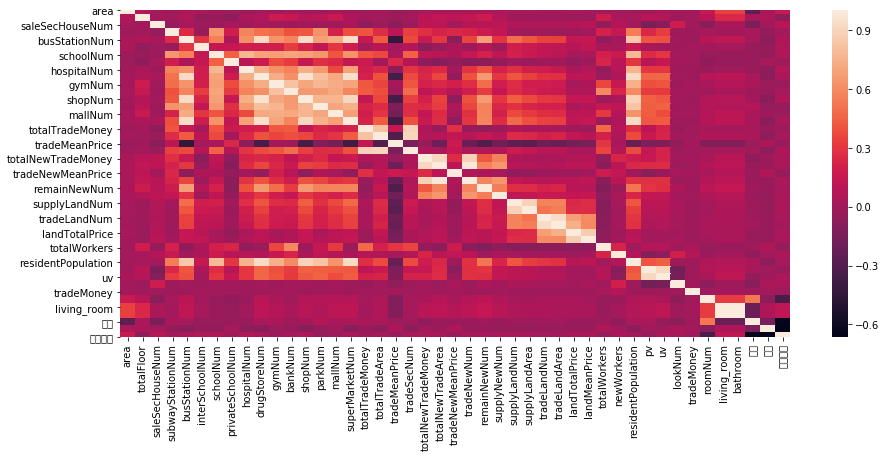

In [113]:
# 数值
corr = data.corr()
plt.figure(figsize=(15,6))
# print(corr)
sns.heatmap(corr)
#还有一些数据需要改变

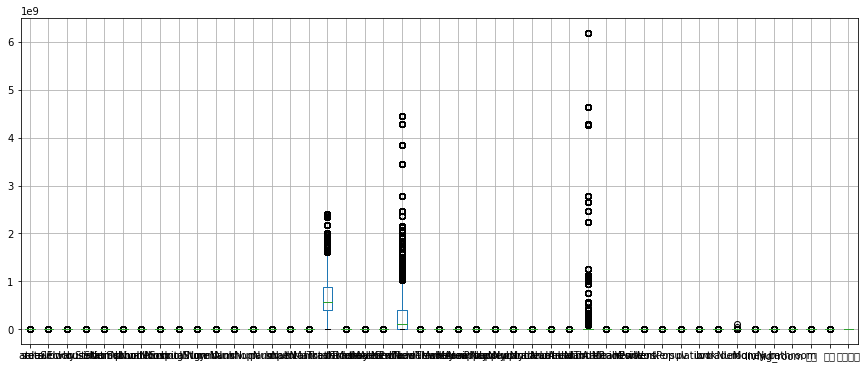

In [66]:
# 箱线图统计
plt.figure(figsize=(15,6))
data.boxplot()